In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('Loan.csv')
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
train.drop('Loan_ID', axis=1, inplace = True)
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


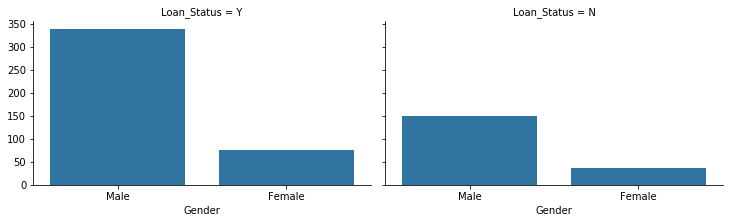

In [6]:
grid = sns.FacetGrid(train, col = 'Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

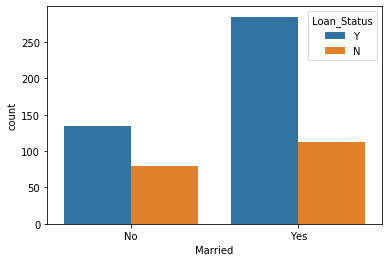

In [7]:
sns.countplot(x='Married', hue='Loan_Status', data=train)

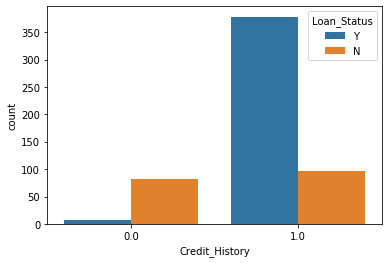

In [8]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)

In [9]:
train['Credit_History'] = train['Credit_History'].astype('O')

In [10]:
train_num = []
train_cat = []

for i, x in enumerate(train.dtypes):
    if x == 'object':
        train_cat.append(train.iloc[:,i])
    else:
        train_num.append(train.iloc[:,i])

In [11]:
train_num = pd.DataFrame(train_num).T
train_cat = pd.DataFrame(train_cat).T

In [12]:
train_num.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0


In [13]:
train_cat.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N


In [14]:
train_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [16]:
# Done with handling train_cat nan values
train_num = train_num.apply(lambda x: x.fillna(method = 'bfill'))
train_num.isnull().sum().any()

False

In [17]:
train_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,128.0,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [18]:
train_cat.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [19]:
# Done with handling train_cat nan values
train_cat = train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
train_cat.isnull().sum().any()

False

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
# Transform the Target Column
target_values = {'Y':0, 'N':1}
target = train_cat['Loan_Status']
train_cat.drop('Loan_Status', axis=1, inplace = True)
target = target.map(target_values)

In [22]:
for x in train_cat:
    train_cat[x] = encoder.fit_transform(train_cat[x])

In [23]:
#final train set
train  = pd.concat([train_cat, train_num, target], axis =1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state= 42)

In [25]:
y = train['Loan_Status']
X = train.drop('Loan_Status', axis =1)

In [26]:
X.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0


In [27]:
for train_index, test_index in split.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 11) (491,)
(123, 11) (123,)


In [28]:
X_train.isnull().sum().any()

False

In [29]:
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, mean_absolute_error

In [30]:
def compute_loss(predictions, y_test):
    print('MAE             :',mean_absolute_error(y_test, predictions))
    print('MSE             :', mean_squared_error(y_test, predictions))
    print('RMSE            :', np.sqrt(mean_squared_error(y_test, predictions)))
    print('Log Loss        :',log_loss(y_test,predictions))
    print('Accuracy Score  :',accuracy_score(predictions,y_test))

In [31]:
#Now we will train a model using Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
compute_loss(predictions, y_test)

MAE             : 0.17073170731707318
MSE             : 0.17073170731707318
RMSE            : 0.4131969352706687
Log Loss        : 5.896883764922072
Accuracy Score  : 0.8292682926829268


In [32]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
compute_loss(predictions, y_test)

MAE             : 0.2926829268292683
MSE             : 0.2926829268292683
RMSE            : 0.5410017808004594
Log Loss        : 10.109040180206408
Accuracy Score  : 0.7073170731707317


In [33]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
compute_loss(predictions, y_test)

MAE             : 0.3170731707317073
MSE             : 0.3170731707317073
RMSE            : 0.563092506371473
Log Loss        : 10.951475363738547
Accuracy Score  : 0.6829268292682927


In [34]:
## KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
compute_loss(predictions, y_test)

MAE             : 0.3821138211382114
MSE             : 0.3821138211382114
RMSE            : 0.6181535578949711
Log Loss        : 13.197834836787194
Accuracy Score  : 0.6178861788617886


In [36]:
import pickle
# open a file, where you ant to store the data
file = open('logistic_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(log_reg, file)